#### Import required libraries

In [7]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import scipy as math
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from imageio import imread
import warnings
warnings.filterwarnings('ignore')

import keras
from keras.models import Model, Sequential
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.python.keras.backend import set_session

import sys
sys.path.append('..')
import src.session_notebook_helpers as session_notebook_helpers
tf.logging.set_verbosity(tf.logging.ERROR)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
running


#### Load in validation data

In [8]:

val_generator = session_notebook_helpers.load_val_generator()
# image_size = 200
# batch_size = 32
# valgen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, preprocessing_function=notebook_helpers.predict_custom_image) 
# val_generator = valgen.flow_from_directory(
#                 validation_path,  # directory for validation images
#                 target_size=(image_size, image_size),
#                 batch_size=batch_size,
#                 class_mode='categorical',
#                 color_mode='grayscale',
#                 shuffle=False)


Found 30 images belonging to 29 classes.


In [4]:
# classifier = notebook_helpers.load_saved_model('../../models/model19.keras')
# graph = tf.get_default_graph()
# sess = keras.backend.get_session()
# init = tf.global_variables_initializer()
# sess.run(init)


In [9]:

edger = session_notebook_helpers.load_saved_model('../../models/edge_detect/unet2.keras')
classifier = session_notebook_helpers.load_saved_model('../../models/model33.h5')


running
running


In [10]:
classifier.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 128)     1280      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 200, 128)     0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5120000)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 29)                148480029 
Total params: 148,481,309
Trainable params: 148,481,309
Non-trainable params: 0
_________________________________________________________________


#### Edge detection quick look

running


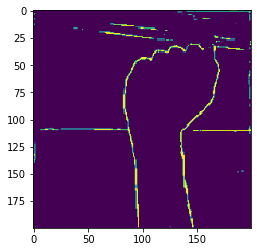

In [12]:
plt.imshow(array_to_img(val_generator[0][0][0]))
    

#### Load in our classifier model

In [14]:
session_notebook_helpers.evaluate_generator(classifier, val_generator)

running


FailedPreconditionError: Error while reading resource variable dense_1_1/kernel from Container: localhost. This could mean that the variable was uninitialized. Not found: Resource localhost/dense_1_1/kernel/N10tensorflow3VarE does not exist.
	 [[{{node dense_1_1/MatMul/ReadVariableOp}}]]

In [12]:
del classifier


In [ ]:
preds = []
for pred in classifier.predict_generator(val_generator, verbose=1):
    preds.append(np.argmax(pred) + 1)
true = val_generator.classes

In [35]:
print(list(true))
print(preds)

[1, 2, 3, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 27, 28]
[6, 10, 14, 14, 10, 14, 3, 6, 6, 6, 6, 6, 6, 10, 3, 14, 18, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
